# **Exploratory Data Analysis EDA**

## Objectives

* Explore the dataset
* Visualise the data with charts
* Investigate hypotheses

## Inputs

* Cleaned dataset 

## Outputs

* Charts and visuals


---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [4]:
import os
current_dir = os.getcwd()
current_dir


'c:\\Users\\tb975\\OneDrive\\Documents\\vs_code_projects\\Student-Academic-Performance\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [5]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [6]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\tb975\\OneDrive\\Documents\\vs_code_projects\\Student-Academic-Performance'

# Overview of the Data

In this notebook I will be visualising the data with some charts. 
I will also be considering my hypotheses.

## Hypotheses

- Hypothesis 1: Average internal test score is more strongly correlated with final exam marks than attendance.
- H2
- H3
- H4

In [7]:
#import libraries for data visualisation
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


First step read the cleaned dataset into a pandas dataframe

In [8]:
#read cleaned dataset into dataframe
df = pd.read_csv('data/academic_performance_cleaned.csv')
#view first 10 rows
df.head(10)

,Attendance (%),Internal Test 1 (out of 40),Internal Test 2 (out of 40),Assignment Score (out of 10),Daily Study Hours,Final Exam Marks (out of 100),Average Test Score,Study Group
0,84,30,36,7,3,72,33.0,low
1,91,24,38,6,3,56,31.0,low
2,73,29,26,7,3,56,27.5,low
3,80,36,35,7,3,74,35.5,low
4,84,31,37,8,3,66,34.0,low
5,100,34,34,7,3,79,34.0,low
6,96,40,36,8,3,83,38.0,low
7,83,39,37,7,3,77,38.0,low
8,91,30,37,8,2,71,33.5,low
9,87,27,37,8,3,61,32.0,low


A reminder of the basic information, including data types. When the cleaned CSV is saved and read into this new notebook the data types revert back to int64, so I will convert them to int8 again. This is not absolutely necessary with this project as the dataset is not too large, but this may be a useful step with an enormous dataset to save memory and time.
I will also convert the study group datatype from object to category. 

In [9]:
#show data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Attendance (%)                 2000 non-null   int64  
 1   Internal Test 1 (out of 40)    2000 non-null   int64  
 2   Internal Test 2 (out of 40)    2000 non-null   int64  
 3   Assignment Score (out of 10)   2000 non-null   int64  
 4   Daily Study Hours              2000 non-null   int64  
 5   Final Exam Marks (out of 100)  2000 non-null   int64  
 6   Average Test Score             2000 non-null   float64
 7   Study Group                    2000 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 125.1+ KB


In [10]:
#loop through columns with int64 and change the datatype to int8
df = df.astype({col: 'int8' for col in df.select_dtypes('int64').columns})

#loop through them and convert datatypes to category
df = df.astype({col: 'category' for col in df.select_dtypes('object').columns})
#display datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Attendance (%)                 2000 non-null   int8    
 1   Internal Test 1 (out of 40)    2000 non-null   int8    
 2   Internal Test 2 (out of 40)    2000 non-null   int8    
 3   Assignment Score (out of 10)   2000 non-null   int8    
 4   Daily Study Hours              2000 non-null   int8    
 5   Final Exam Marks (out of 100)  2000 non-null   int8    
 6   Average Test Score             2000 non-null   float64 
 7   Study Group                    2000 non-null   category
dtypes: category(1), float64(1), int8(6)
memory usage: 29.5 KB


A reminder of the summary statistics. All values are realistic, not too high or low.

In [11]:
#summary statistics
df.describe()

,Attendance (%),Internal Test 1 (out of 40),Internal Test 2 (out of 40),Assignment Score (out of 10),Daily Study Hours,Final Exam Marks (out of 100),Average Test Score
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000
mean,84.891500,32.115500,32.464500,7.507000,2.823500,64.855000,32.29000
std,7.758855,4.563504,4.522827,1.021015,0.608714,11.341265,3.61091
min,52.000000,18.000000,16.000000,4.000000,1.000000,25.000000,19.50000
25%,80.000000,29.000000,29.000000,7.000000,2.000000,58.000000,30.00000
50%,85.000000,32.000000,33.000000,8.000000,3.000000,65.000000,32.50000
75%,90.000000,35.000000,36.000000,8.000000,3.000000,73.000000,35.00000
max,100.000000,40.000000,40.000000,10.000000,5.000000,100.000000,40.00000


# Data Distribution

I will investigate the distribution of the numerical columns in this dataset using histograms. 

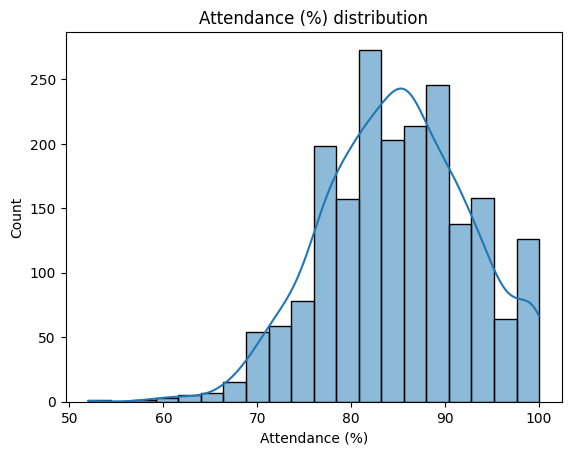

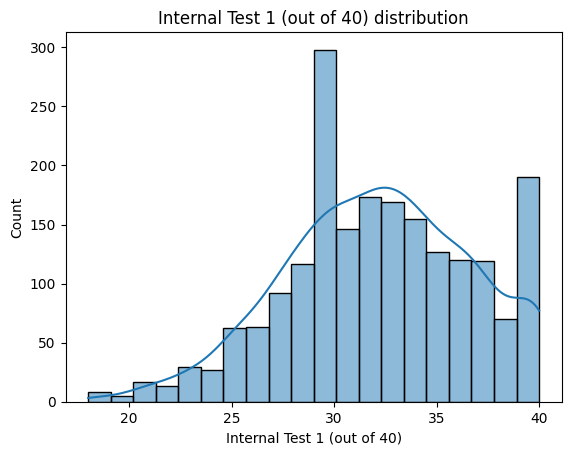

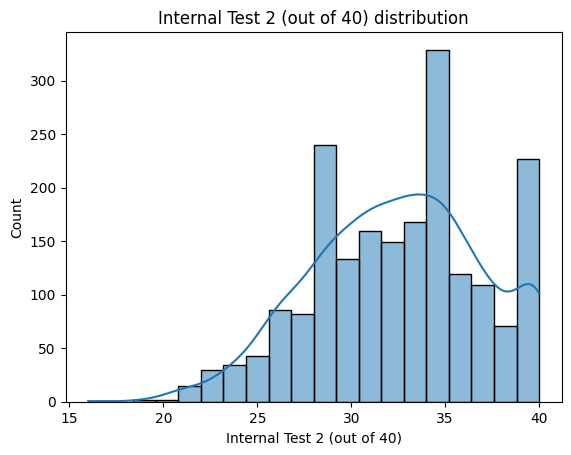

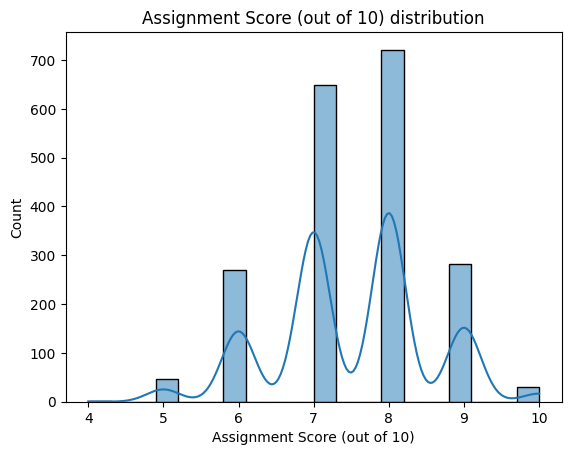

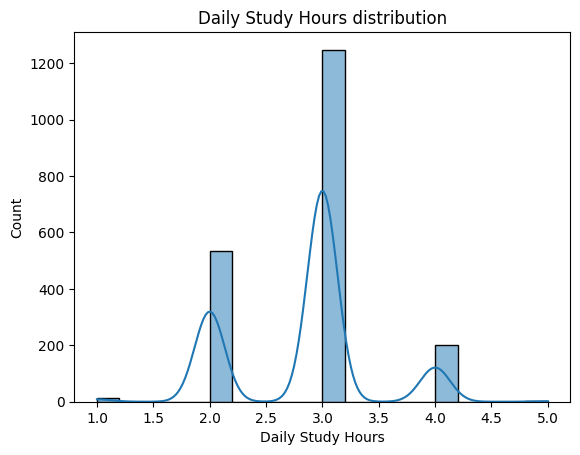

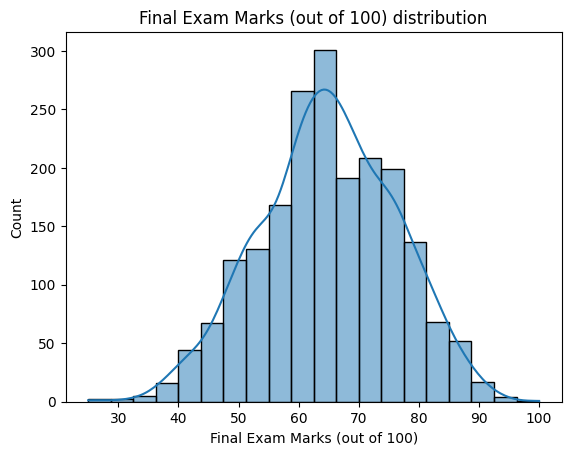

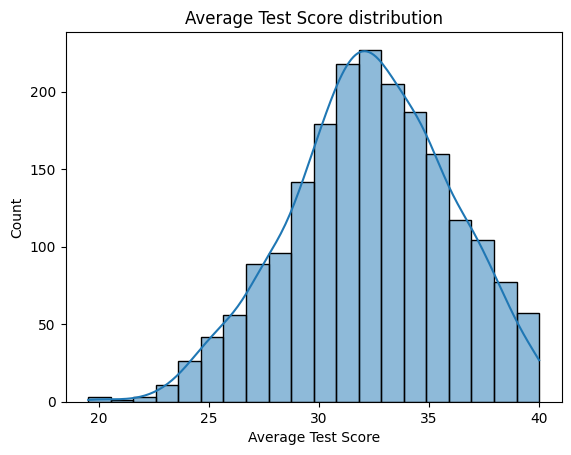

In [12]:
#store numerical column names in a list called num_cols
num_cols = df.select_dtypes(['int8','float64']).columns

#loop over the columns and plot a historgram for each
for col in num_cols:
    sns.histplot(data=df, x=col, kde=True, bins=20)
    plt.title(f'{col} distribution')
    plt.show()



Some of these distributions look skewed rather than normal. I can assess the skewness of the data using .skew

In [13]:
#assess skewness
df[num_cols].skew().round(3)

Attendance (%)                  -0.135
Internal Test 1 (out of 40)     -0.229
Internal Test 2 (out of 40)     -0.211
Assignment Score (out of 10)    -0.132
Daily Study Hours               -0.035
Final Exam Marks (out of 100)   -0.119
Average Test Score              -0.193
dtype: float64

Visually attendance and the internal test scores are a little negatively skewed. This means that on average more people have high attendence and high scores in their internal tests.
Having said this the skew values of the data above are fairly close to 0:
- Attendance = **-0.135**
- Internal test results = **-0.229** and **-0.211**

These values are within the range of what can be considered to be approximately symmetric, meaning that the results are appropriate for Pearson correlation an parametric statistical tests. 
The Final exam marks are even more normally distributed, and when the test scores are averaged their skew is reduced. 

---

# Pairplot 

A pairplot is a useful way to get a quick understanding and overview of the dataset. I have coloured by study group to see if there is a discernable difference betwen pupils that studied for a long time and those that did not. 
I am going to leave out the internal assessment scores, using only the average test scores, I am also going to leave out the daily study hours as this is captured by the colour difference

In [14]:
#get the column names to help me make my list of columns I am interested in
df.columns.unique()

Index(['Attendance (%)', 'Internal Test 1 (out of 40)',
       'Internal Test 2 (out of 40)', 'Assignment Score (out of 10)',
       'Daily Study Hours', 'Final Exam Marks (out of 100)',
       'Average Test Score', 'Study Group'],
      dtype='object')

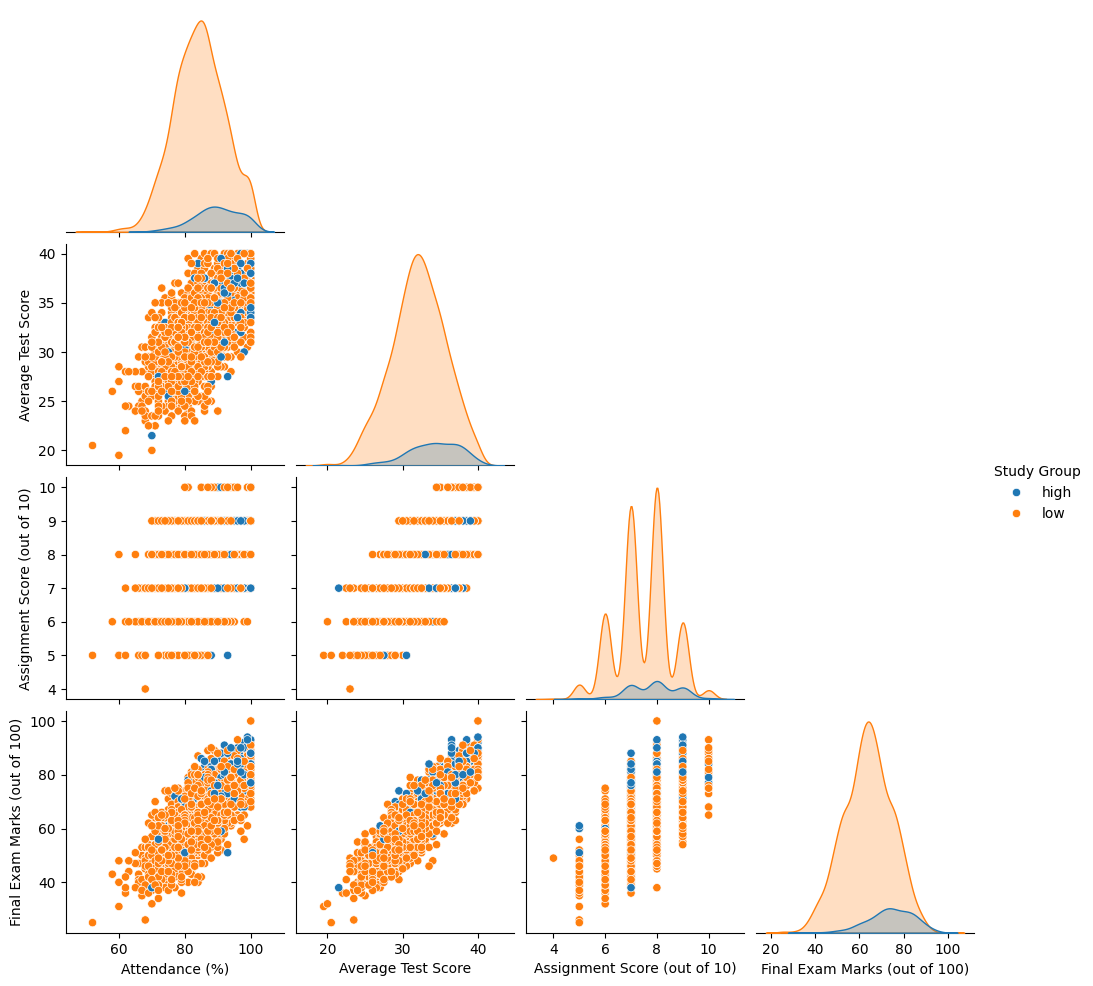

In [15]:
#list of the columns I am interested in
pair_cols = ['Attendance (%)', 'Average Test Score', 
             'Assignment Score (out of 10)', 'Final Exam Marks (out of 100)', 
             'Study Group']
#pair plot to show relationships between variables
sns.pairplot(df[pair_cols], hue='Study Group', corner=True, )
plt.show()

You can see from the pairplot that as attendance, average test score and assignment scores increase that the final exam scores increase.
It seems that, though this is not always the case, the high study group have higher final marks, as well as possibly higher attendance and higher test grades. I will be investigating this further in the analysis of my hypotheses. 

# Hypothesis Testing

### **Hypothesis 1**: Average internal test score is more strongly correlated with final exam marks than attendance.

In order to validate this hypothesis I will:

- plot internal test score and attendance against final exam marks on two separate graphs. 

- perform a Pearson correlation analysis and plot the results on a correlation heatmap.

- compare the correlation scores for the two parameters in question. 

First I need to import plotly so I can make interactive charts

In [29]:
import plotly.express as px
import plotly.io as pio

for col in ['Average Test Score', 'Attendance (%)']:
    fig = px.scatter(df, x=col, y='Final Exam Marks (out of 100)', trendline='ols', title=(f'{col} against Final Exam Marks'))
    fig.show()

These scatter plot suggest that there is a positive relationship between both parameters and final exam results. To determine which variable has the stronger linear correlation, we can calculate the Pearson correlation coefficients and visualise them in a correlation heatmap.

In [30]:
# get unique columns 
df.columns.unique()

Index(['Attendance (%)', 'Internal Test 1 (out of 40)',
       'Internal Test 2 (out of 40)', 'Assignment Score (out of 10)',
       'Daily Study Hours', 'Final Exam Marks (out of 100)',
       'Average Test Score', 'Study Group'],
      dtype='object')

In [ ]:
#Select the columns that I want to see how they correlate
corr_cols = ['Attendance (%)', 'Assignment Score (out of 10)',
       'Daily Study Hours', 'Final Exam Marks (out of 100)',
       'Average Test Score']
#calculate pearson correlation coefficient for these columns
df_corr = df[corr_cols].corr(method='pearson')
#display results
df_corr.round(3)

,Attendance (%),Assignment Score (out of 10),Daily Study Hours,Final Exam Marks (out of 100),Average Test Score
Attendance (%),1.000,0.432,0.299,0.726,0.629
Assignment Score (out of 10),0.432,1.000,0.169,0.669,0.698
Daily Study Hours,0.299,0.169,1.000,0.413,0.276
Final Exam Marks (out of 100),0.726,0.669,0.413,1.000,0.868
Average Test Score,0.629,0.698,0.276,0.868,1.000


These correlation coefficients show us how correlated different parameters are. The closer to 1 the more directly correlated. The size of these numbers is useful but hard to interpret. A correlation heatmap makes the relationships easier to visualise.

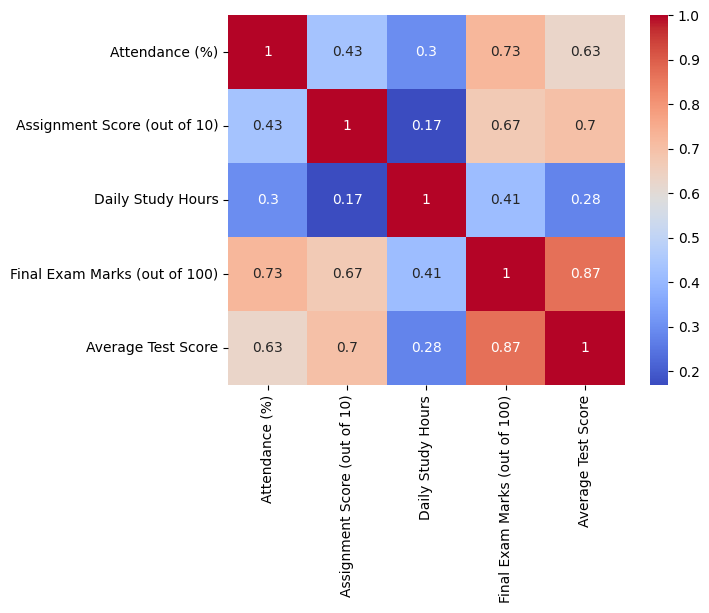

In [36]:
#correlation heatmap
sns.heatmap(data=df_corr, annot=True, cmap='coolwarm')
plt.show()

It is possible to remove the other side and make the heatmap clearer by using a mask. The following code is copied from the code institute LMS

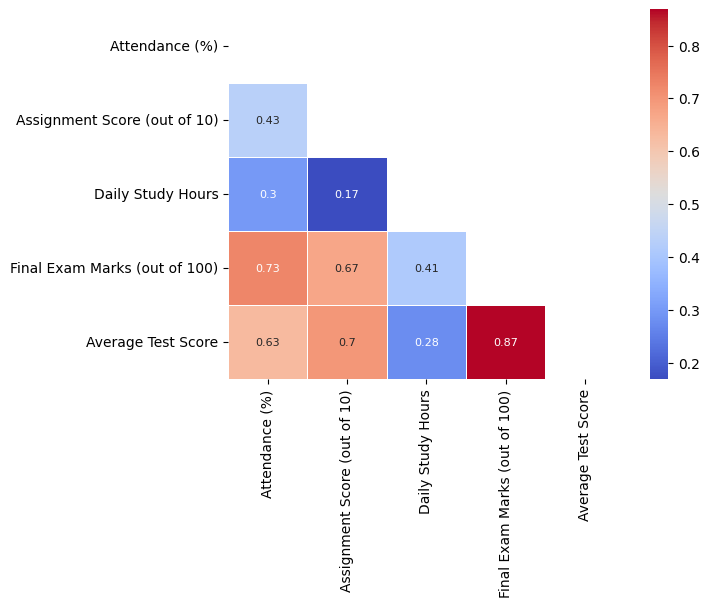

In [37]:
# code copied from LMS to remove duplicated side
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_corr,annot=True,mask=mask,cmap='coolwarm',annot_kws={"size": 8},linewidths=0.5)
plt.ylim(df_corr.shape[1],0);
plt.show()


NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [17]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)


IndentationError: expected an indented block after 'try' statement on line 2 (553063055.py, line 5)